# Fractional Integral

This notebook is linked to the following
[blog post](https://harpaz.wordpress.com/2024/10/29/fractional-derivatives/)
, and is based on the following
[YouTube video](https://www.youtube.com/watch?v=wSBrfl0Ox2A)
by [Zundamon's theorem](https://www.youtube.com/@zunda-theorem)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

from IPython.display import display

# $\frac{d^{-n}}{d x^{-n}}$

In [2]:
x = Symbol('x')
c = Symbol('c')
f = Function('f')

## $\frac{d^{-n}}{d x^{-n}} f(x) = \frac{1}{(1-n)!} \int_c^x (x-t)^{n-1} f(t) dt$

In [3]:
# Implementing the above equation, taking in `f`, `x`, and `n`
def negative_derivative(f: Function, x: Symbol, n: int):
    t = Symbol('t')
    return (1/(factorial(n-1))) * integrate( (x-t)**(n-1) * f(t), (t, c, x) )

In [4]:
# Showing, symbolically, that it works
negative_derivative(f, x, 1)

Integral(f(t), (t, c, x))

## Testing first integral

Starting off, we shall work with integer values of $n$.
</br>
Specifically, with $n=1$.
Seeing that basic integrals work as fine.

$f(x) = 1$

In [5]:
negative_derivative(lambda t: 1, x, 1)

-c + x

$f(x)=x$

In [6]:
negative_derivative(lambda t: t, x, 1)

-c**2/2 + x**2/2

$f(x)=x^2$

In [7]:
negative_derivative(lambda t: t**2, x, 1)

-c**3/3 + x**3/3

$f(x)=sin(x)$

In [8]:
negative_derivative(sin, x, 1)

cos(c) - cos(x)

Neat! it all works!

## Testing multiple integrals

Still, working with integer $n$ values,
we now test multiple integrals
</br>
(e.g. $n=3$ corresponds to $\int \int \int f \; dt dt' dt''$)

Note that $n=0$ is a special case, as it involves $\frac{1}{(-1)!}$, and it should, in theory, represent the identity
($n=1$ is an integral, $n=-1$ is a derivative, so $n=0$ should be the identity)
but it is very reasonable that this definition did not take the $n=0$ edge-case into account

In [9]:
for i in range(0, 5):
    print(f"The {i} integral of 1:")
    display( negative_derivative(lambda t: 1, x, i) )

The 0 integral of 1:


0

The 1 integral of 1:


-c + x

The 2 integral of 1:


c**2/2 - c*x + x**2/2

The 3 integral of 1:


-c**3/6 + c**2*x/2 - c*x**2/2 + x**3/6

The 4 integral of 1:


c**4/24 - c**3*x/6 + c**2*x**2/4 - c*x**3/6 + x**4/24

In [10]:
for i in range(0, 5):
    print(f"The {i} integral of sin:")
    result = negative_derivative(sin, x, i)
    # remove the constant terms
    clean_result = sum( tuple(filter(lambda arg: 'x' in str(arg), result.args)) )
    display( clean_result )

The 0 integral of sin:


0

The 1 integral of sin:


-cos(x)

The 2 integral of sin:


x*cos(c) - sin(x)

The 3 integral of sin:


-c*x*cos(c) + x**2*cos(c)/2 + x*sin(c) + cos(x)

The 4 integral of sin:


c**2*x*cos(c)/2 - c*x**2*cos(c)/2 - c*x*sin(c) + x**3*cos(c)/6 + x**2*sin(c)/2 - x*cos(c) + sin(x)

Neat! it all works!

## Doing half-integral

Now we're taking.

Plugging in $n=1/2$, we expect to get something in the middle between doing nothing, and taking one integral.
</br>
In addition, we expect that 2 half-integrals will be equivalent to a single integral.

Let's see how it goes:

$f(x) = 1$

In [11]:
temp = negative_derivative(lambda t: 1, x, 1/2)
temp

1.12837916709551*(-c + x)**0.5

In [12]:
temp2 = negative_derivative(lambda t: temp.subs(x, t), x, 1/2)
temp2

0.424413181578388*(-c + x)**1.5*hyper((0.5, 1.5), (2.5,), (-c + x)*exp_polar(2*I*pi)/polar_lift(-c + x))/polar_lift(-c + x)**0.5

In [13]:
temp2.simplify()

1.0*(-c + x)**1.5/polar_lift(-c + x)**0.5

The `polar_lift` comes from `sympy` not knowing if `c=0 & x=0` is a possibility, which will make the integral diverge.

For our case, we can (happily) ignore this edge case
</br>
Thus, when reading the result above, we can treat $\text{polar\_lift}^\alpha(y) = y^\alpha$
</br>
And, just like that, we have $1 \cdot (x - c)$, which is indeed the integral of $f(x)=1$

</br></br>

We may now with to understand these 2 half-integrals analytically.

Thus, let's have some manual calculations:

Using $n=\frac{1}{2}$ and $f(x)=1$, we get:
$$ I^{1/2} = \frac{d^{-1/2}}{dx^{-1/2}} f = \frac{1}{(-\frac{1}{2})!} \int_c^x (x-t)^{-1/2} dt $$
$$ \Rightarrow I^{1/2} = \frac{1}{(-\frac{1}{2})!} (-2) \sqrt{x-t} \Big|_c^x = \frac{2}{(-\frac{1}{2})!} \sqrt{x-c} $$

Let's check if indeed $\frac{2}{(-\frac{1}{2})!} \approx 1.1283$, thus proving that it's indeed the factor that's shown above

In [14]:
2/factorial(-1/2)

1.12837916709551

Awesome!

</br>

Next, let us plot the half-integral, along with $f(x)=1$ and $f(x)=x$

Thus, we'll be able to see if it indeed is somewhere "between" doing no integral to doing 1 integral

In [15]:
const = 0
I_zero = lambda x: 1
I_half = lambda x: 2 / factorial(-1/2) * sqrt(x-const)
I_one = lambda x: x-const

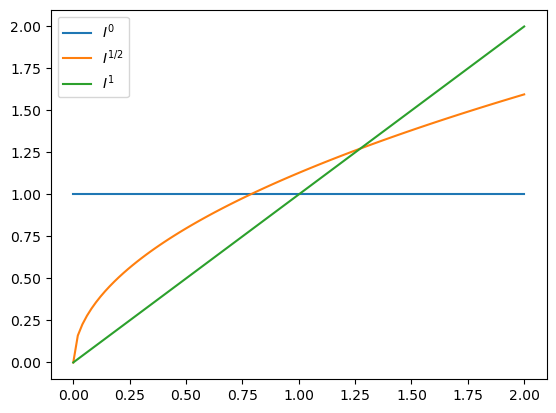

In [16]:
X = np.linspace(0,2,100)

def map_(func, itr):
    return np.fromiter(map(func, itr), float)

plt.plot(X, map_(I_zero, X), label="$I^0$")
plt.plot(X, map_(I_half, X), label="$I^{1/2}$")
plt.plot(X, map_(I_one, X), label="$I^1$")
plt.legend()

-----------------

Next up, let's look at $f(x)=x$

In [17]:
try:
    temp = negative_derivative(lambda t: t, x, 1/2)
    temp
except Exception as exc:
    print(f"Failed: {str(exc)}")
    print("Bummer")

Failed: Non-suitable parameters.
Bummer


unfortunately, `sympy` wasn't able to solve this integral :(

How about $f(x)=\cos(x)$ ?
Will it give $\sin$?

In [18]:
temp = negative_derivative(cos, x, 1/2)
temp

0.564189583547756*Integral(cos(t)/(-t + x)**0.5, (t, c, x))

In [19]:
try:
    temp2 = negative_derivative(lambda t: temp.subs(x, t), x, 1/2)
    temp2
except Exception as exc:
    print(f"Failed: {str(exc)}")
    print("Bummer")

Failed: Invalid NaN comparison
Bummer


Well, that's just writing the definition.
It solved nothing :(

## Doing 3 $\frac{1}{3}$ integrals

With half-integrals of more complicated functions out of the way,
let us look at third-integrals!

Back to working with $f(x)=1$

The first third-integral:

In [20]:
temp = negative_derivative(lambda t: 1, x, 1/3)
temp

1.11984652172219*(-c + x)**0.333333333333333

The second third-integral:

In [21]:
temp2 = negative_derivative(lambda t: temp.subs(x, t), x, 1/3)
display(temp2)

0.313514058053319*(-c + x)**1.33333333333333*hyper((0.666666666666667, 1.33333333333333), (2.33333333333333,), (-c + x)*exp_polar(2*I*pi)/polar_lift(-c + x))/polar_lift(-c + x)**0.666666666666667

In [22]:
temp3 = temp2.simplify()
temp3

1.10773216743247*(-c + x)**1.33333333333333/polar_lift(-c + x)**0.666666666666667

The third third-integral:

In [23]:
temp4 = negative_derivative(lambda t: temp3.subs(x, t), x, 1/3)
display(temp4)

0.413496671566344*Integral((-c + t)**1.33333333333333/((-t + x)**0.666666666666667*polar_lift(-c + t)**0.666666666666667), (t, c, x))

In [24]:
temp5 = temp4.simplify()
temp5

0.413496671566344*Integral((-c + t)**1.33333333333333/((-t + x)**0.666666666666667*polar_lift(-c + t)**0.666666666666667), (t, c, x))

In summary:

$I^0 = 1$

$I^{1/3} = 1.1198 (x-c)^{1/3}$

$I^{2/3} = 1.1077 (x-c)^{2/3}$

$I^{3/3} = 0.4134 \int_c^x \left( \frac{t-c}{x-t} \right)^{2/3}$

Let's try to understand the pre-factors, and to solve the unresolved last integral

### Understanding $I^{1/3}$

Using $n=\frac{1}{3}$ and $f(x)=1$, we get:
$$ I^{1/3} = \frac{d^{-1/3}}{dx^{-1/3}} f = \frac{1}{(-\frac{2}{3})!} \int_c^x (x-t)^{-2/3} dt $$
$$ \Rightarrow I^{1/3} = \frac{1}{(-\frac{2}{3})!} (-3) (x-t)^{1/3} \Big|_c^x = \frac{3}{(-\frac{2}{3})!} (x-c)^{1/3} $$

Checkint that indeed $\frac{3}{(-\frac{2}{3})!} \approx 1.1198$

In [25]:
3/factorial(-2/3)

1.11984652172219

Neat!

### Understanding $I^{2/3}$

$n=\frac{1}{3}$ and $f(x)=I^{1/3}$, we get:
$$ I^{2/3} = \frac{d^{-1/3}}{dx^{-1/3}} I^{1/3} = \frac{1}{(-\frac{2}{3})!} \int_c^x (x-t)^{-2/3} \left( \frac{3}{(-\frac{2}{3})!} (t-c)^{1/3} \right) dt $$

In [26]:
t = Symbol('t')
third = 1/Integer(3)
integrand = (x-t)**(third-1) * (t-c)**third

print("Integrand:")
integrand

Integrand:


(-c + t)**(1/3)/(-t + x)**(2/3)

In [27]:
result = integrate(integrand, (t,c,x))

print("Raw result:")
display(result)

print("Simplified result:")
result_simple = result.simplify()
display(result_simple)

Raw result:


(-c + x)**(4/3)*gamma(4/3)*hyper((2/3, 4/3), (7/3,), (-c + x)*exp_polar(2*I*pi)/polar_lift(-c + x))/(gamma(7/3)*polar_lift(-c + x)**(2/3))

Simplified result:


2**(1/3)*(-c + x)**(4/3)*gamma(1/6)*gamma(1/3)/(4*sqrt(pi)*polar_lift(-c + x)**(2/3))

That result is only the part of the integrand that involves $t$.
We shouldn't forget the factors that multiply it

In [28]:
print("Simplified result + pre-factor:")
result_simple_with_factors = (3 / (factorial(-2/3)**2)) * result_simple
N(result_simple_with_factors)

Simplified result + pre-factor:


1.10773216743247*(-c + x)**0.666666666666667

Nice!
</br>
That indeed is the factor we saw above.

Let's collect all the factors together, to double-check ourselved
</br>
(And recall that $\Gamma(n) = (n-1)!$   )

In [29]:
pre_factor = (3 / (factorial(-2/3)**2))
integral_result_factor = 2**(1/3) * factorial(-5/6) * factorial(-2/3) / (4 * sqrt(np.pi))
pre_factor * integral_result_factor

1.10773216743247

Success!

$$
\Rightarrow I^{2/3}
= \frac{3}{((-\frac{2}{3})!)^2} \frac{\sqrt[3]{2} \Gamma(\frac{1}{6}) \Gamma(\frac{1}{3})}{4 \sqrt{\pi}} (x-c)^{2/3}
= \frac{ 3 \sqrt[3]{2} }{ 4 \sqrt{\pi} } \frac{ (-\frac{5}{6})! }{ (-\frac{2}{3})! } (x-c)^{2/3}
$$

### Understanding $I^{3/3}$

Starting off, let's call the $I^{2/3}$ factor, say, $\alpha$.
</br>
Thus: $I^{2/3} = \alpha (x-c)^{2/3}$, with $\alpha = \frac{ 3 \sqrt[3]{2} }{ 4 \sqrt{\pi} } \frac{ (-\frac{5}{6})! }{ (-\frac{2}{3})! } \approx 1.1077$

Using the definition, again, we have:

$$ I^{3/3} = \frac{d^{-1/3}}{dx^{-1/3}} I^{2/3} = \frac{1}{(-\frac{2}{3})!} \int_c^x (x-t)^{-2/3} \left( \alpha (t-c)^{2/3} \right) dt $$

The previous integrand was: $\frac{ (t-c)^{1/3} }{ (x-t)^{2/3} }$
</br>
This integrand is: $\frac{ (t-c)^{2/3} }{ (x-t)^{2/3} }$

This may be the beginning for the pattern of $I^{m/n}$ involving, maybe, the integrand $\frac{ (t-c)^{m/n} }{ (x-t)^{(n-1)/n} }$

#### Attempt \#1: $\left( \frac{t-c}{x-t} \right)^{2/3}$

In [30]:
t = Symbol('t')

def solve_integral(integrand):
    print("Integrand:")
    display(integrand)
    print()
    print()

    result = integrate(integrand, (t,c,x))
    print("Raw result:")
    display(result)
    print("Simplified result:")
    result_simple = result.simplify()
    display(result_simple)
    return result_simple

In [31]:
two_thirds = 2/Integer(3)
integrand = ((t-c)/(x-t))**two_thirds
solve_integral(integrand);

Integrand:


((-c + t)/(-t + x))**(2/3)



Raw result:


Integral(((-c + t)/(-t + x))**(2/3), (t, c, x))

Simplified result:


Integral(((c - t)/(t - x))**(2/3), (t, c, x))

#### Attempt \#2: $\left( \frac{t-c}{x-t} \right)^{\beta}$ with $\beta=2/3$

In [32]:
beta = Symbol("beta")
integrand = ((t-c)/(x-t))**beta
solve_integral(integrand);

Integrand:


((-c + t)/(-t + x))**beta



Raw result:


Integral(((-c + t)/(-t + x))**beta, (t, c, x))

Simplified result:


Integral(((c - t)/(t - x))**beta, (t, c, x))

#### Attempt \#3: $\frac{(t-c)^\beta}{(x-t)^\beta}$ with $\beta=2/3$

In [33]:
beta = Symbol("beta")
integrand = ((c-t)**beta) / ((t-x)**beta)
solve_integral(integrand);

Integrand:


(c - t)**beta/(t - x)**beta



Raw result:


-0**(beta + 1)*exp(I*pi*beta)*gamma(beta + 1)*hyper((beta, beta + 1), (beta + 2,), 0)/(gamma(beta + 2)*polar_lift(c - x)**beta) + (-c + x)**(beta + 1)*exp(I*pi*beta)*gamma(beta + 1)*hyper((beta, beta + 1), (beta + 2,), (-c + x)*exp_polar(I*pi)/polar_lift(c - x))/(gamma(beta + 2)*polar_lift(c - x)**beta)

Simplified result:


(-0**(beta + 1) + (-c + x)**(beta + 1)*hyper((beta, beta + 1), (beta + 2,), (-c + x)*exp_polar(I*pi)/polar_lift(c - x)))*exp(I*pi*beta)/((beta + 1)*polar_lift(c - x)**beta)

#### Attempt \#4: $\frac{(t-c)^{2/3}}{(x-t)^{2/3}}$

In [34]:
two_thirds = 2 / Integer(3)
integrand = ((c-t)**two_thirds) / ((t-x)**two_thirds)
solve_integral(integrand);

Integrand:


(c - t)**(2/3)/(t - x)**(2/3)



Raw result:


-(c - x)**(1/3)*gamma(1/3)*hyper((-2/3, 1/3), (4/3,), (c - x)*exp_polar(2*I*pi)/polar_lift(c - x))*polar_lift(c - x)**(2/3)/gamma(4/3)

Simplified result:


-4*sqrt(3)*pi*(c - x)**(1/3)*polar_lift(c - x)**(2/3)/9

Some simple manual check:
</br>
Printing the numerical evaluation of the above result
(to get the factor given from the integral)
</br>
And multiplying that by the factor from our previous result:
$I^{3/3} = 0.4134 \int_c^x \left( \frac{t-c}{x-t} \right)^{2/3}$

In [35]:
N(result_simple)

2.64995812542817*(-c + x)**0.666666666666667

In [36]:
0.413 * 2.418

0.998634

Nice! that's almost $1$.

Now, for a more thorough test for the pre-factors.
</br></br>

Collecting all the pre-factors, we have:

the pre-factors from $I^{2/3}$ are: 
$$ \alpha = \frac{ 3 \sqrt[3]{2} }{ 4 \sqrt{\pi} } \frac{ (-\frac{5}{6})! }{ (-\frac{2}{3})! } \approx 1.1077 $$

The integral result from above is: 
$$ \frac{4 \sqrt{3} \pi}{9} (x-c) $$

Plus, we have $\frac{1}{(-\frac{2}{3})!}$ from the definition

Together, the factors are:
$$
\underbrace{
    \left[ \frac{ 3 \sqrt[3]{2} }{ 4 \sqrt{\pi} } \frac{ (-\frac{5}{6})! }{ (-\frac{2}{3})! } \right]
}_{\text{from } I^{2/3}}
\underbrace{
    \left[ \frac{4 \sqrt{3} \pi}{9} \right]
}_{\text{from integral}}
\underbrace{
    \left[ \frac{1}{(-\frac{2}{3})!} \right]
}_{\text{definition}}
$$

multiplying them together:
$$
\left[ \frac{ 3 \sqrt[3]{2} }{ 4 \sqrt{\pi} } \frac{ (-\frac{5}{6})! }{ (-\frac{2}{3})! } \right]
\left[ \frac{4 \sqrt{3} \pi}{9} \right]
\left[ \frac{1}{(-\frac{2}{3})!} \right]
= \frac{3 \sqrt{3}}{9} \frac{4 \sqrt[3]{2}}{4} \frac{\pi}{\sqrt{\pi}} \frac{ (-\frac{5}{6})! }{ ((-\frac{2}{3})!)^2 }
= \frac{1}{\sqrt{3}} \sqrt[3]{2} \sqrt{\pi} \frac{ (-\frac{5}{6})! }{ ((-\frac{2}{3})!)^2 }
$$

Using wolfram, we have:
$$ \Gamma \left( \frac{1}{6} \right) = \sqrt{\frac{3}{\pi}} \Gamma \left( \frac{1}{3} \right)^2 \frac{1}{\sqrt[3]{2}} $$

Leading to:
$$
\frac{1}{\sqrt{3}} \sqrt[3]{2} \sqrt{\pi}
\frac{1}{ ((-\frac{2}{3})!)^2 }
\left[ \sqrt{\frac{3}{\pi}} \Gamma \left( \frac{1}{3} \right)^2 \frac{1}{\sqrt[3]{2}} \right]
= \left[ \frac{1}{\sqrt{3}} \sqrt[3]{2} \sqrt{\pi} \sqrt{\frac{3}{\pi}} \frac{1}{\sqrt[3]{2}} \right]
\left[ \frac{1}{ ((-\frac{2}{3})!)^2 } \Gamma \left( \frac{1}{3} \right)^2 \right]
= 1
$$

Awesome!

</br>
</br>
Now, all that's left is to plot it

$I^0 = 1$

$I^{1/3} = \alpha (x-c)^{1/3}$ ; $\alpha = \frac{3}{(-\frac{2}{3})!} \approx 1.1198$

$I^{2/3} = \beta (x-c)^{2/3}$ ; $\beta = \frac{ 3 \sqrt[3]{2} }{ 4 \sqrt{\pi} } \frac{ (-\frac{5}{6})! }{ (-\frac{2}{3})! } \approx 1.1077$

$I^{3/3} = x-c$

In [37]:
const = 0
I_zero = lambda x: 1
I_third = lambda x: 1.1198 * (x-const)**(1/3)
I_two_thirds = lambda x: 1.1077 * (x-const)**(2/3)
I_one = lambda x: x-const

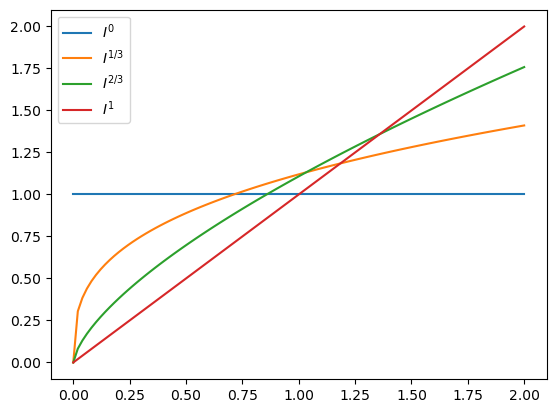

In [38]:
X = np.linspace(0,2,100)

def map_(func, itr):
    return np.fromiter(map(func, itr), float)

plt.plot(X, map_(I_zero, X), label="$I^0$")
plt.plot(X, map_(I_third, X), label="$I^{1/3}$")
plt.plot(X, map_(I_two_thirds, X), label="$I^{2/3}$")
plt.plot(X, map_(I_one, X), label="$I^1$")
plt.legend()

Nice! that really looks like smoothing the transition from $f(x)=1$ to $f(x)=x$ !